## There is only one test

Copyright 2018 Allen Downey

License: http://creativecommons.org/licenses/by/4.0/

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

import numpy as np
import matplotlib.pyplot as plt

## The tumbleweed problem

Here's an example that uses the "[There is only one test](http://allendowney.blogspot.com/2016/06/there-is-still-only-one-test.html)" framework to solve a problem from the [2019 AP® Statistics Exam](https://secure-media.collegeboard.org/apc/ap19-frq-statistics.pdf)

> Tumbleweed, commonly found in the western United States, is the dried structure of certain plants that are
blown by the wind. Kochia, a type of plant that turns into tumbleweed at the end of the summer, is a problem for
farmers because it takes nutrients away from soil that would otherwise go to more beneficial plants. Scientists
are concerned that kochia plants are becoming resistant to the most commonly used herbicide, glyphosate. 

> In 2014, 19.7 percent of 61 randomly selected kochia plants were resistant to glyphosate. In 2017, 38.5 percent of 52 randomly selected kochia plants were resistant to glyphosate. Do the data provide convincing statistical
evidence, at the level of $\alpha = 0.05$, that there has been an increase in the proportion of all kochia plants that are resistant to glyphosate? 

Because the problem reports the data in terms of percentages, we have to work backwards to get the actual number of plants in each group that were resistant:

In [2]:
0.197 * 61

12.017000000000001

In [3]:
0.385 * 52

20.02

It looks like there were 12 resistant plants in the first group and 20 in the second group.

In [4]:
k1 = 12
k2 = 20
k = k1 + k2

32

And here are the sample sizes.

In [5]:
n1 = 61
n2 = 52
n = n1 + n2

113

The first step toward hypothesis testing is to define a test statistic that measures the size of the effect.  In this case, the hypothetical effect is an increase in the fraction of resistant plants, that is, a difference in proportions.

I'll write a function that takes the data as a parameter and computes the difference in proportions.

In [6]:
def test_stat(data):
    """Compute the test statistic."""
    k1, n1, k2, n2 = data
    p1 = k1/n1
    p2 = k2/n2
    return p2 - p1

I pass the data to the function as a tuple of 4 numbers.

In [7]:
data = k1, n1, k2, n2

(12, 61, 20, 52)

Now we can compute the observed difference in proportions (and check it against the numbers in the problem).

In [8]:
actual = test_stat(data)

0.1878940731399748

In [9]:
0.385 - 0.197

0.188

Now we need a null hypothesis.  The scientists think there might be an increase in the fraction of resistant plants, so the null hypothesis is that there is no increase.

Under that assumption, the two groups have the same proportion of resistant plants, which we can estimate by pooling the data and computing the proportion among all of the observed plants.

In [10]:
p = k / n

0.2831858407079646

Now, the fundamental question in hypothesis testing is this: under the null hypothesis, what would be the chance of seeing an apparent effect as big as `actual`?

To answer that question, we simulate the null hypothesis and generate "fake data", then compute the test statistic of the fake data.

I'll use the following function, which simulates flipping `n` coins, each with probability `p` of landing heads, and returns the total number of heads.

In [11]:
def flip(n, p):
    """Flip n coins with probability p.
    
    n: number of coins
    p: probability of heads
    
    return: total number of heads
    """
    return np.sum(np.random.random(n) < p)

As an example, I'll simulate the two groups and compute the number of resistant plants in each group.

In [12]:
flip(n1, p)

24

In [13]:
flip(n2, p)

17

Now we can wrap that in a function that returns the results in the same format as the original data, a tuple of 4 numbers.

In [14]:
def run_model(data):
    """Simulate the null hypothesis."""
    k1, n1, k2, n2 = data
    p = (k1 + k2) / (n1 + n2)
    k1 = flip(n1, p)
    k2 = flip(n2, p)
    return k1, n1, k2, n2

Returning the results in that format makes it possible to pass the "fake data" directly to `test_stat`.

In [15]:
test_stat(run_model(data))

0.0012610340479193016

That's the result of one simulated experiment.

Now we run the experiment 1000 times and collect the results.

In [16]:
test_stat_dist = np.array([test_stat(run_model(data)) 
                           for i in range(1000)])


array([-0.1056116 ,  0.00693569, -0.00945776, -0.11349306, -0.01229508,
        0.10025221,  0.07534678, -0.02301387,  0.00693569, -0.15983607,
        0.00126103, -0.16551072,  0.02332913, -0.07786885, -0.15479193,
        0.00189155, -0.04224464, -0.07786885,  0.10813367, -0.02868852,
        0.20428752,  0.10025221,  0.0759773 ,  0.03972257, -0.04791929,
       -0.0037831 , -0.08858764, -0.00662043, -0.08921816,  0.01544767,
       -0.06147541,  0.07534678, -0.09993695,  0.11380832, -0.04224464,
       -0.12988651, -0.1056116 , -0.00094578,  0.1223203 , -0.18757881,
        0.03184111, -0.02301387, -0.04508197,  0.02332913, -0.1056116 ,
        0.05390921,  0.02900378, -0.08354351,  0.00409836, -0.06147541,
        0.11948298, -0.0501261 ,  0.09741488, -0.03940731,  0.08102144,
       -0.00662043,  0.11380832, -0.08575032, -0.08070618, -0.11916772,
       -0.01450189, -0.0258512 , -0.0721942 ,  0.110971  ,  0.10025221,
       -0.04791929,  0.02332913, -0.04224464,  0.05958386,  0.00

The result is the "sampling distribution of the test statistic under the null hypothesis".

The mean of this distribution is close to zero, which is not suprising because it is based on the assumption that there is actually no difference between the groups.

In [17]:
np.mean(test_stat_dist)

-0.0010378310214375767

Here's what the distribution of test statistics looks like.

The vertical gray line shows the observed effect size, `actual`. 

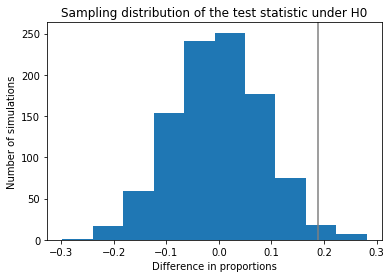

In [18]:
plt.hist(test_stat_dist)
plt.axvline(actual, color='gray')
    
plt.xlabel('Difference in proportions')
plt.ylabel('Number of simulations')
plt.title('Sampling distribution of the test statistic under H0');

Now we can compute the probability that the test statistic, under the null hypothesis, exceeds the observed difference.

This probability is the "p-value".

In [19]:
p_value = np.mean(test_stat_dist >= actual)

0.015

The estimated p-value is less than the specified threshold, $\alpha = 0.05$, so the observed difference is considered statistically significant.

## Different test statistics

When I present the "There is only one test" framework, many of the questions I get are about choosing the test statistic.  In many cases, it seems like an arbitrary choice.

And in some ways it is, although rather than "arbitrary", I would say it is a modeling decision informed by the context.  In this example, the researchers think there might be an *increase* in the proportion of resistant plants, so I chose a test statistic that measures an increase.

If the researchers expected a *change* in resistance without specifying an increase or decrease, I might use the absolute value of the difference as a test statistic, because the absolute value measures magnitude without regard to sign.

Using the *difference* in proportions was also a choice; another possibility is to use the *ratio* of proportions.  In the context of epidemiology, it is common to use [risk ratios](https://en.wikipedia.org/wiki/Risk_ratio) to compare proportions.

One benefit of the computational framework is that it is easy to try a different test statistic (or a different model of the null hypothesis) and see what effect it has on the results.

Here's a function that computes the ratio of proportions.

In [20]:
def test_stat(data):
    k1, n1, k2, n2 = data
    p1 = k1/n1
    p2 = k2/n2
    return p2 / p1

Here's the observed risk ratio.

In [21]:
actual = test_stat(data)

1.9551282051282053

Now we can run the simulated experiments with this test statistic, and compute the p-value.

In [22]:
test_stat_dist = np.array([test_stat(run_model(data)) 
                       for i in range(1000)])

p_value = np.mean(test_stat_dist >= actual)

0.016

The two test statistics yield pretty much the same p-values.  That's good; it means that the interpretation of the results is not sensitive to our modeling choices.